Лабораторна робота №6

Студента групи МІТ-31 (підгрупа 2)

Фуркала Олександра Олександровича

Завдання

Shape of training data: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test data: (10000, 28, 28)
Shape of test labels: (10000,)
Shape of validation data: (12000, 28, 28)
Shape of validation data: (12000,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00

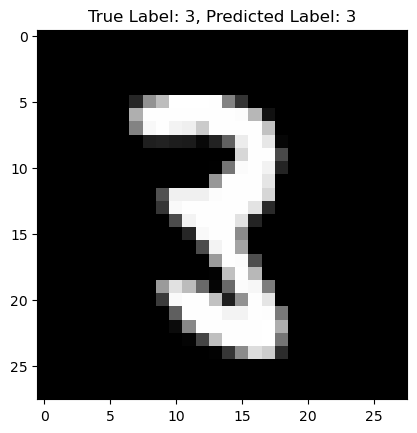

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
# імпортуємо набір даних MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
# Нормалізує значення пікселів зображень у діапазоні [0, 1]
#У вихідному наборі даних MNIST значення пікселів коливаються від 0 до 255, де 0 — чорний, а 255 — білий. 
#Якщо значення кожного пікселя поділити на 255,0, значення масштабуються до діапазону [0, 1].

print("Shape of training data:", x_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of test data:", x_test.shape)
print("Shape of test labels:", y_test.shape)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print("Shape of validation data:", x_val.shape)
print("Shape of validation data:", y_val.shape)

model = tf.keras.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Flatten використовується для зведення вхідних даних. 
#У цьому випадку це зведення вхідних зображень 28x28 у одновимірний масив розміром 28 * 28 = 784.
# Dense - повністю пов’язаний (щільний, dense) шар із 128 нейронами. Використовувана функція активації 
#Rectified Linear Unit (ReLU), яка зазвичай використовується в прихованих рівнях нейронних мереж.
# Dropout - це техніка регулярізації, яка допомагає запобігти переобладнанню.
#Він випадковим чином встановлює частку вхідних одиниць на 0 під час кожного оновлення під час навчання.
#Параметр 0,5 означає, що під час навчання приблизно 50% вхідних одиниць буде видалено при кожному оновленні.
# Останній шар використовує softmax, який зазвичай використовується для задач багатокласової класифікації. 
#Він перетворює необроблені вихідні дані моделі в оцінки ймовірності для кожного класу.
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# sparse_categorical_crossentropy обчислює перехресну втрату ентропії між справжніми мітками та прогнозованими ймовірностями.
# Метрики використовуються для моніторингу продуктивності моделі під час навчання.
#У цьому випадку в якості метрики вибрано "accuracy", точність; метрика вимірює частку правильно класифікованих зразків.
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

sample_index = np.random.randint(0, len(x_test))
sample_image = x_test[sample_index]
true_label = y_test[sample_index]
sample_image_reshaped = np.expand_dims(sample_image, axis=0)
# Розширює розміри масиву sample_image, додаючи додатковий розмір на початку. 
#Це робиться для відповідності вхідній формі, очікуваній моделлю. Модель очікує вхідних даних у формі (batch_size, 28, 28), 
#а додавання додаткового виміру гарантує, що вибірка розглядатиметься як партія розміру 1.
prediction = np.argmax(model.predict(sample_image_reshaped))
# predict повертає необроблений результат моделі, який є розподілом ймовірностей за класами.
#argmax використовується для знаходження індексу максимального значення в прогнозованих ймовірностях, 
#ефективно ідентифікуючи прогнозований клас.

plt.imshow(sample_image, cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {prediction}")
plt.show()